<a href="https://colab.research.google.com/github/hilmisyarif406/mlbaisc/blob/main/SubmissionDicoding_MuhammadHilmiSyarif_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from google.colab import files

In [ ]:
#install dan import package tambahan untuk split folder dataset
!pip install split-folders
import splitfolders as sf

In [ ]:
#download dataset
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-23 13:32:52--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.00MB/s    in 52s     

2021-04-23 13:33:45 (5.87 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#extract file dataset
import zipfile,os
data_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(data_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
  
inp = '/tmp/rockpaperscissors/rps-cv-images'
out = '/tmp/rockpaperscissors/output'

#split folder untuk train dan vailidation
sf.ratio(inp, output=out, seed=1337, ratio=(.6, .4), group_prefix=None)

Copying files: 2188 files [00:01, 1356.37 files/s]


In [ ]:
train_dir = out+'/train'
validation_dir = out+'/val'

In [ ]:
os.listdir(train_dir)

['scissors', 'paper', 'rock']

In [ ]:
os.listdir(validation_dir)

['scissors', 'paper', 'rock']

In [ ]:
#augmentasi image untuk membuat gambar lebih bervariasi
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range = 0.1,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range = 0.1,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=6,
        # karena ini merupakan masalah klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')
 
val_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=6,
        # karena ini merupakan masalah klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
#model CNN 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),  #148, 148, 32
    tf.keras.layers.MaxPooling2D(2, 2),   #74, 74, 32
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), #72, 72, 64
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), #70, 70, 64
    tf.keras.layers.MaxPooling2D(2,2), #35, 35, 64
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), #33, 33, 128
    tf.keras.layers.MaxPooling2D(2,2), #16, 16 ,128
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), #14, 14, 128
    tf.keras.layers.MaxPooling2D(2,2), #7, 7, 128
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 70, 70, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 35, 35, 64)       

In [ ]:
#compile model dengan adam dan loss function sparse_categorical_crossentropy
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
#latih model
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch training yang akan dieksekusi pada setiap epoch
      epochs=50, 
      validation_data=val_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=10,  # berapa batch validation yang akan dieksekusi pada setiap epoch
      verbose=1)

Epoch 1/50
25/25 [==============================] - 16s 580ms/step - loss: 1.2394 - accuracy: 0.3449 - val_loss: 1.0984 - val_accuracy: 0.3333
Epoch 2/50
25/25 [==============================] - 14s 566ms/step - loss: 1.0997 - accuracy: 0.3337 - val_loss: 1.0972 - val_accuracy: 0.3333
Epoch 3/50
25/25 [==============================] - 14s 566ms/step - loss: 1.1005 - accuracy: 0.1886 - val_loss: 1.0967 - val_accuracy: 0.4333
Epoch 4/50
25/25 [==============================] - 14s 566ms/step - loss: 1.0949 - accuracy: 0.3640 - val_loss: 1.0847 - val_accuracy: 0.4333
Epoch 5/50
25/25 [==============================] - 14s 564ms/step - loss: 1.0673 - accuracy: 0.3930 - val_loss: 0.9802 - val_accuracy: 0.5667
Epoch 6/50
25/25 [==============================] - 14s 566ms/step - loss: 0.7715 - accuracy: 0.6563 - val_loss: 1.0651 - val_accuracy: 0.7167
Epoch 7/50
25/25 [==============================] - 14s 567ms/step - loss: 0.6756 - accuracy: 0.8101 - val_loss: 0.5535 - val_accuracy: 0.8333

Saving IMG20210419234358.jpg to IMG20210419234358 (1).jpg
IMG20210419234358.jpg
Hasil Prediksi :
[[1. 0. 0.]]
paper


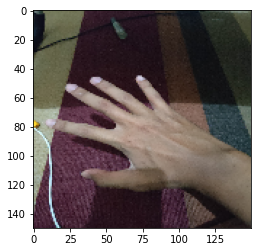

In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print('Hasil Prediksi :')
  print(classes)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')

In [ ]:
# Submission Machine Learning untuk Pemula
# Muhammad Hilmi Syarif
# username: hilmisyarif
# emali: hilmisyarif406@gmail.com
# Mahasiswa Teknik Informatika Fakultas Ilmu Komputer Universitas Singaperbangsa Karawang